In [1]:
import pandas as pd

# 모든 장르의 데이터 읽어오기

In [2]:
df_SF = pd.read_csv('./data/[영어]SF장르_Sci-fi.csv',encoding='utf-8')
df_Dr = pd.read_csv('./data/[영어]드라마장르_Drama_그림체.csv', encoding='utf-8')
df_Ro = pd.read_csv('./data/[영어]로맨스장르_Romance_그림체.csv', encoding='utf-8')
df_Ro2 = pd.read_csv('./data/[영어]로맨스.csv', encoding='utf-8')
df_SN = pd.read_csv('./data/[영어]슈퍼네츄럴장르_Supernatural_그림체.csv',encoding='utf-8')
df_SH = pd.read_csv('./data/[영어]슈퍼히어로_Superhero.csv', encoding='utf-8')
df_Th = pd.read_csv('./data/[영어]스릴러장르_Thriller.csv', encoding='utf-8')
df_Ac = pd.read_csv('./data/[영어]액션장르_Action_그림체.csv', encoding='utf-8')
df_So = pd.read_csv('./data/[영어]일상장르_Slice of life.csv', encoding='utf-8')
df_Co = pd.read_csv('./data/[영어]코미디장르_Comedy_그림체.csv', encoding='utf-8')
df_Fa = pd.read_csv('./data/[영어]판타지장르_Fantasy_그림체.csv', encoding='utf-8')

# 모든 장르 데이터 하나의 데이터로 통합

In [3]:
df = df_SF
df = df.append(df_Dr)
df = df.append(df_Ro)
df = df.append(df_SH)
df = df.append(df_SN)
df = df.append(df_So)
df = df.append(df_Th)
df = df.append(df_Ac)
df = df.append(df_Co)
df = df.append(df_Fa)
df = df.append(df_Ro2)
df = df.reset_index(drop=True)

## One Hot encoding위한 모든 장르 컬럼으로 만들기

In [4]:
print(df['Genre'].unique())
for i in df['Genre'].unique():
    df[i] = 0
df

['Sci-fi' 'Drama' 'Romance' 'Superhero' 'Supernatural' 'Slice of life'
 'Thriller' 'Action' 'Comedy' 'Fantasy']


,Title,Genre,Author,Subscribers,Grade,Amount,Comments Likes,SO,KE,ML,...,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
0,Down To Earth,Sci-fi,Pookie Senpai,1.9M,9.82,79278.0,66082,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Phase,Sci-fi,Jouki,766.6K,9.61,112248.0,19548,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Gamer,Sci-fi,Sangyoung Seong / Sang-A,1.8M,9.63,39430.0,7079,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LoveBot,Sci-fi,Chase Keels / Miranda Mundt,267.1K,9.41,74481.0,11115,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,It Was All You,Sci-fi,I SOON KI / OH5HO ...,158.1K,9.53,122901.0,14620,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,To You Who Swallowed a Star,Romance,ARI,302.5K,9.58,101521.0,22674,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,Surviving Romance,Romance,Lee Yone,246K,9.82,127095.0,18282,0,0,0,...,0,0,0,0,0,0,0,0,0,0
829,Devilish Romance,Romance,Lee Kong-joo / White Eagle,329.7K,9.47,108575.0,11300,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,No Longer A Heroine!,Romance,Maenggi Ki,382.8K,9.38,99042.0,18390,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 장르 One Hot Encoding

In [5]:
for i in df['Title'].unique():                                     # 각 웹툰 제목에 대해 
    WebToon = list(df[df['Title'] == i].index)                     # 하나의 웹툰이 여러 장르가 있는지 파악
    if len(WebToon) >= 2:                                          # 웹툰이 2개 이상 속해 있다면,
        for j in WebToon:                                          # 해당 웹툰의 장르 컬럼마다 값 1로 변경 (one-hot encoding) 
            df.loc[j, df[df['Title'] == i]['Genre']] = 1          
    else:
        df.loc[WebToon[0], df[df['Title'] == i]['Genre']] = 1     # 웹툰이 1개이면, 해당 장르 컬럼 값 1로 변경
df

,Title,Genre,Author,Subscribers,Grade,Amount,Comments Likes,SO,KE,ML,...,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
0,Down To Earth,Sci-fi,Pookie Senpai,1.9M,9.82,79278.0,66082,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,Phase,Sci-fi,Jouki,766.6K,9.61,112248.0,19548,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,The Gamer,Sci-fi,Sangyoung Seong / Sang-A,1.8M,9.63,39430.0,7079,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,LoveBot,Sci-fi,Chase Keels / Miranda Mundt,267.1K,9.41,74481.0,11115,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,It Was All You,Sci-fi,I SOON KI / OH5HO ...,158.1K,9.53,122901.0,14620,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,To You Who Swallowed a Star,Romance,ARI,302.5K,9.58,101521.0,22674,0,0,0,...,0,1,1,0,0,0,0,0,0,0
828,Surviving Romance,Romance,Lee Yone,246K,9.82,127095.0,18282,0,0,0,...,0,0,1,0,0,0,0,0,0,0
829,Devilish Romance,Romance,Lee Kong-joo / White Eagle,329.7K,9.47,108575.0,11300,0,0,0,...,0,0,1,0,1,0,0,0,0,0
830,No Longer A Heroine!,Romance,Maenggi Ki,382.8K,9.38,99042.0,18390,0,0,0,...,0,1,1,0,0,0,0,0,0,0


# 장르column , 중복 제거 후 index 재설정

In [6]:
df = df.drop(columns='Genre')
df = df.drop_duplicates(['Title'])
df = df.reset_index(drop=True)
df

,Title,Author,Subscribers,Grade,Amount,Comments Likes,SO,KE,ML,KA,...,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
0,Down To Earth,Pookie Senpai,1.9M,9.82,79278.0,66082,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,Phase,Jouki,766.6K,9.61,112248.0,19548,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,The Gamer,Sangyoung Seong / Sang-A,1.8M,9.63,39430.0,7079,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,LoveBot,Chase Keels / Miranda Mundt,267.1K,9.41,74481.0,11115,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,It Was All You,I SOON KI / OH5HO ...,158.1K,9.53,122901.0,14620,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Blades of Furry,Deya Muniz / Emily Erdos,356.2K,9.62,48199.0,21773,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
467,Brass & Sass,antlerella,584.6K,9.70,128116.0,16453,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
468,Shadow Bride,Sae In Lee / Soo Bean Lim,259.5K,9.77,139157.0,19363,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
469,The Doctors are Out,Blau,435.2K,9.57,60525.0,20492,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


- 데이터 저장 및 불러오기

In [7]:
df.to_csv('[En]WebToon_Data_숫자_변환_전.csv', encoding='utf-8', index=False)
df_WT = pd.read_csv('[En]WebToon_Data_숫자_변환_전.csv', encoding='utf-8')


# 데이터 단위를 숫자로 변환
## 구독자 수
* M -> 1,000,000 (백만) 
* K -> 1,000     (천)

In [8]:
df_WT['Subscribers'] = df_WT['Subscribers'].str.replace('M', '000000')
df_WT['Subscribers'] = df_WT['Subscribers'].str.replace('K', '000')
df_WT['Subscribers'] = df_WT['Subscribers'].str.replace('.', '')
df_WT['Subscribers'] = df_WT['Subscribers'].astype('int64')
df_WT = df_WT.sort_values(by='Subscribers', ascending=False)
df_WT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Title,Author,Subscribers,Grade,Amount,Comments Likes,SO,KE,ML,KA,...,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
47,True Beauty,Yaongyi,62000000,9.65,131236.0,68426,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
49,I Love Yoo,Quimchee,42000000,9.79,99317.0,44787,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
181,Let's Play,Mongie,38000000,9.63,50293.0,182767,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
50,Age Matters,Enjelicious,33000000,9.81,123853.0,47257,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
52,LUMINE,Emma Krogell,29000000,9.83,36064.0,20999,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,ROB,Richard Dinnick / Magda Price & Miguel Sepulveda,56000,8.83,78302.0,245,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
317,Epic V,Ardtron / GNICE,52000,5.75,4239.0,111,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
39,All That You Are,Brayden Sato,44000,9.23,33064.0,246,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
305,Midnight Rhapsody,Wony / Yoonsoo Sim,25000,9.15,6500.0,147,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 좋아요의 수
* M -> 1,000,000 (백만)
* K -> 1,000 (천)
* 결측치 존재하는 데이터에 값 추가
* data type 변경

In [9]:
df_WT['Total Likes'] = df_WT['Total Likes'].str.replace('M', '000000')
df_WT['Total Likes'] = df_WT['Total Likes'].str.replace('K', '000')
df_WT['Total Likes'] = df_WT['Total Likes'].str.replace('.', '')
df_WT['Total Likes'] = df_WT['Total Likes'].str.replace(',', '')
df_WT.loc[149, 'Total Likes'] = 6145440
df_WT['Total Likes'] = df_WT['Total Likes'].astype('int64')
df_WT= df_WT.sort_values(by='Total Likes', ascending=False)
df_WT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Title,Author,Subscribers,Grade,Amount,Comments Likes,SO,KE,ML,KA,...,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
270,My Giant Nerd Boyfriend,fishball,21000000,9.73,16753.0,15940,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
221,unOrdinary,uru-chan,5000000,9.76,188296.0,69607,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
459,Lore Olympus,Rachel Smythe,5000000,9.73,124411.0,93778,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
47,True Beauty,Yaongyi,62000000,9.65,131236.0,68426,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
272,Bluechair,Shen,12000000,9.72,11930.0,5988,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,The Red Hook: STARCROSS,Dean Haspiel,169000,7.00,35000.0,155,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
170,City of Walls,A.K. Lovelace / Shaun Noel,181000,7.41,29760.0,50,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
317,Epic V,Ardtron / GNICE,52000,5.75,4239.0,111,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
236,The Red Hook: Blackout,Dean Haspiel,166000,6.97,44478.0,75,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# 컬럼 순서 변경 

In [10]:
df_WT = df_WT[[
    'Title', 'Author', 'Comments Likes', 'Subscribers', 'Grade', 'Amount',
    'SO', 'KE', 'ML', 'KA', 'Total Likes', 'Sci-fi', 'Drama', 'Romance',
    'Superhero', 'Supernatural', 'Slice of life', 'Thriller', 'Action',
    'Comedy', 'Fantasy'
]]
df_WT

,Title,Author,Comments Likes,Subscribers,Grade,Amount,SO,KE,ML,KA,...,Sci-fi,Drama,Romance,Superhero,Supernatural,Slice of life,Thriller,Action,Comedy,Fantasy
270,My Giant Nerd Boyfriend,fishball,15940,21000000,9.73,16753.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
221,unOrdinary,uru-chan,69607,5000000,9.76,188296.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
459,Lore Olympus,Rachel Smythe,93778,5000000,9.73,124411.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
47,True Beauty,Yaongyi,68426,62000000,9.65,131236.0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
272,Bluechair,Shen,5988,12000000,9.72,11930.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,The Red Hook: STARCROSS,Dean Haspiel,155,169000,7.00,35000.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
170,City of Walls,A.K. Lovelace / Shaun Noel,50,181000,7.41,29760.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
317,Epic V,Ardtron / GNICE,111,52000,5.75,4239.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
236,The Red Hook: Blackout,Dean Haspiel,75,166000,6.97,44478.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# 각 컬럼에 대한 시각화 

## 베스트 댓글 좋아요의 수 

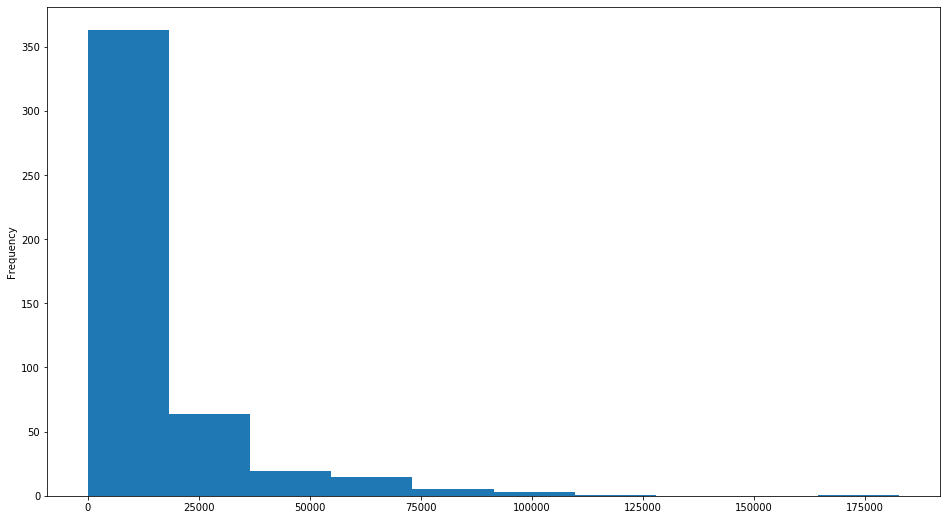

In [11]:
df_WT['Comments Likes'].plot.hist(bins=10, figsize=(16, 9))

## 장르별 작품 수

<BarContainer object of 10 artists>

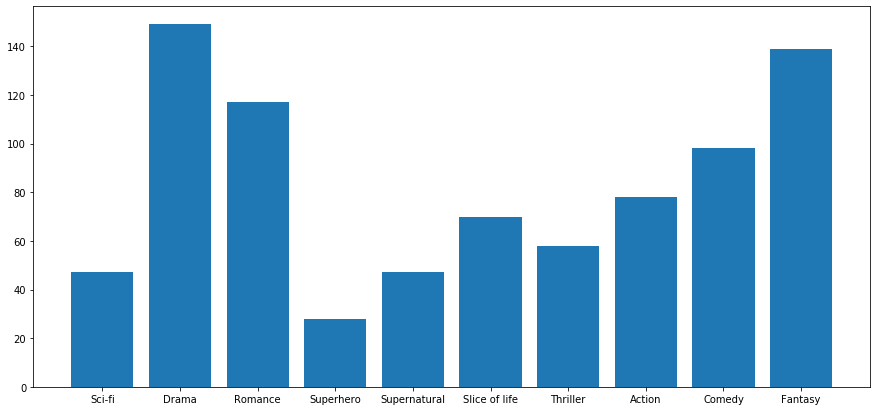

In [12]:
genre,counts= [] ,[]
for i in df_WT.columns[11:]:
    genre.append(i)
    counts.append(df_WT[i].sum())
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.bar(x = genre, height=counts)

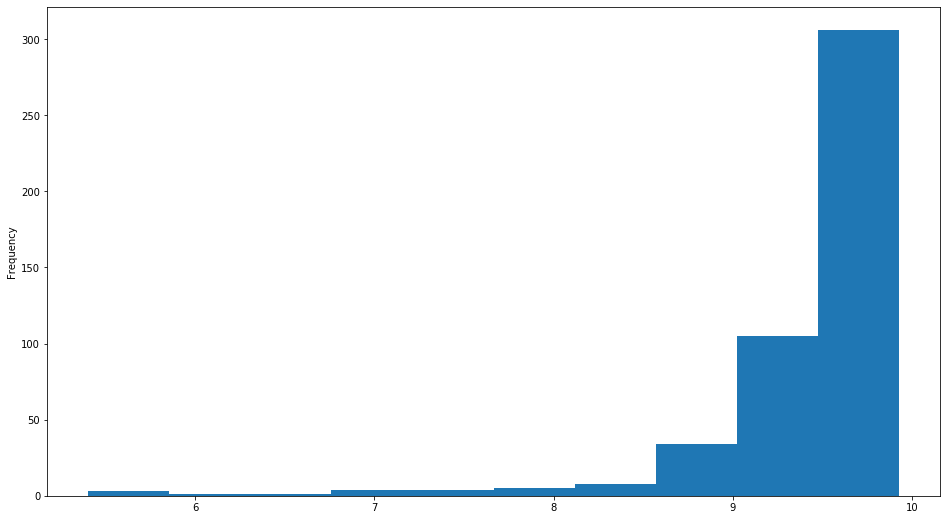

In [13]:
df_WT['Grade'].plot.hist(bins=10, figsize=(16, 9))

## 평점 분포

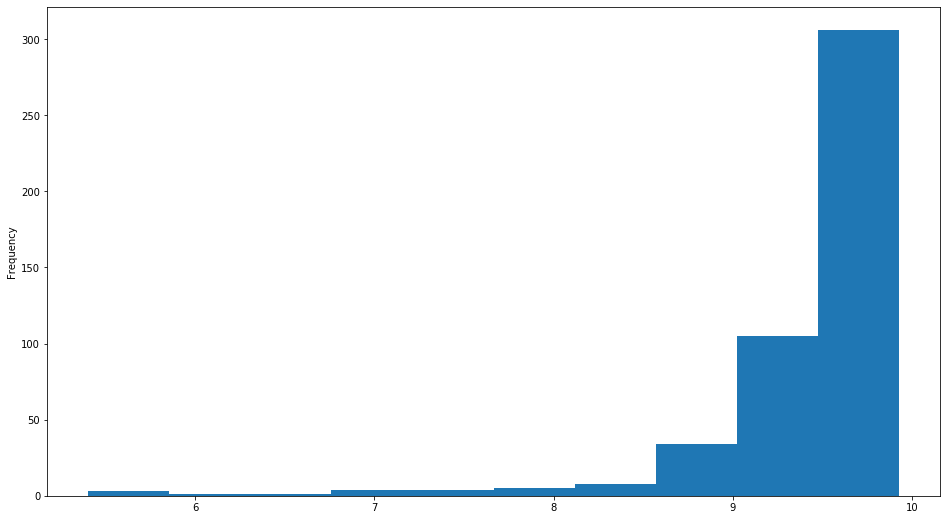

In [14]:
df_WT['Grade'].plot.hist(bins=10, figsize=(16, 9))

In [15]:
df_WT.to_csv('./data/[En]WebToon_Data_Final.csv', encoding='utf-8', index=False)